# Analysis Goal : Active Product Sales Analysis Per Hour

### Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the csv dataset

In [103]:
order_details = pd.read_csv('Order_details.csv') 

### Doing basic exploratory data analysis 
* shape of dataset/n
* column names and datatypes
* null values per column
* file summary

In [104]:
shape = order_details.shape
shape

(581, 4)

In [105]:
Cname_and_datatypes = order_details.dtypes
Cname_and_datatypes

Name                object
Email               object
Product             object
Transaction Date    object
dtype: object

In [106]:
null_vals_per_col = order_details.isnull().sum()
null_vals_per_col

Name                0
Email               0
Product             0
Transaction Date    0
dtype: int64

In [107]:
summary = order_details.describe(include = "all")
summary

,Name,Email,Product,Transaction Date
count,581,581,581,581
unique,525,525,252,581
top,PERSON_470,PERSON_470@gmail.com,PRODUCT_75,01/03/2021 00:47:26
freq,5,5,74,1


### From the above we can conclude
1. The dataset have 4 columns and 581 rows
2. Datatype of all the colums is same
3. 525 duplicate rows
4. 0 null values
   

### We need to find sales per hour

#### Transforming the transaction date to extract the hour of sale

In [108]:
order_details['Time'] = pd.to_datetime(order_details['Transaction Date'])
order_details['Time']

0     2021-01-03 00:47:26
1     2021-01-03 02:04:07
2     2021-01-03 09:10:43
3     2021-01-03 09:49:48
4     2021-01-03 10:56:46
              ...        
576   2021-07-03 23:53:03
577   2021-07-03 23:55:01
578   2021-07-03 23:58:24
579   2021-07-03 23:59:26
580   2021-07-03 23:59:19
Name: Time, Length: 581, dtype: datetime64[ns]

In [111]:
# extracting the hour of sale
order_details['Hour'] = (order_details['Time']).dt.hour
order_details['hour']

0       0
1       2
2       9
3       9
4      10
       ..
576    23
577    23
578    23
579    23
580    23
Name: hour, Length: 581, dtype: int32

In [114]:
hours = order_details['Hour'].value_counts().index.tolist()[:24] 
hours

[12,
 23,
 22,
 19,
 15,
 21,
 20,
 11,
 13,
 18,
 16,
 14,
 17,
 10,
 0,
 9,
 8,
 7,
 1,
 2,
 5,
 6,
 3]

In [115]:
order_count = order_details['Hour'].value_counts().values.tolist()[:24]
order_count

[51,
 51,
 45,
 42,
 41,
 41,
 39,
 37,
 33,
 33,
 29,
 28,
 27,
 24,
 17,
 14,
 10,
 6,
 4,
 3,
 3,
 2,
 1]

In [117]:
hourly_count = np.column_stack((hours,order_count))

print(" Hour Of Day" + "\t" + "Cumulative Number of Purchases \n")
print('\n'.join('\t\t'.join(map(str, row)) for row in hourly_count))

 Hour Of Day	Cumulative Number of Purchases 

12		51
23		51
22		45
19		42
15		41
21		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


### Converting the data to a sorted hour wise manner

In [121]:
hourly_count_sorted = order_details['Hour'].value_counts() #sorted by freq
hours = []

for i in range(0,23):
    hours.append(i)
    
order_count = hourly_count_sorted.sort_index()
order_count.tolist()
order_count = pd.DataFrame(order_count)
print("Sorted By Freq")
hourly_count_sorted

Sorted By Freq


Hour
12    51
23    51
22    45
19    42
15    41
21    41
20    39
11    37
13    33
18    33
16    29
14    28
17    27
10    24
0     17
9     14
8     10
7      6
1      4
2      3
5      3
6      2
3      1
Name: count, dtype: int64

### Creating the visualisation

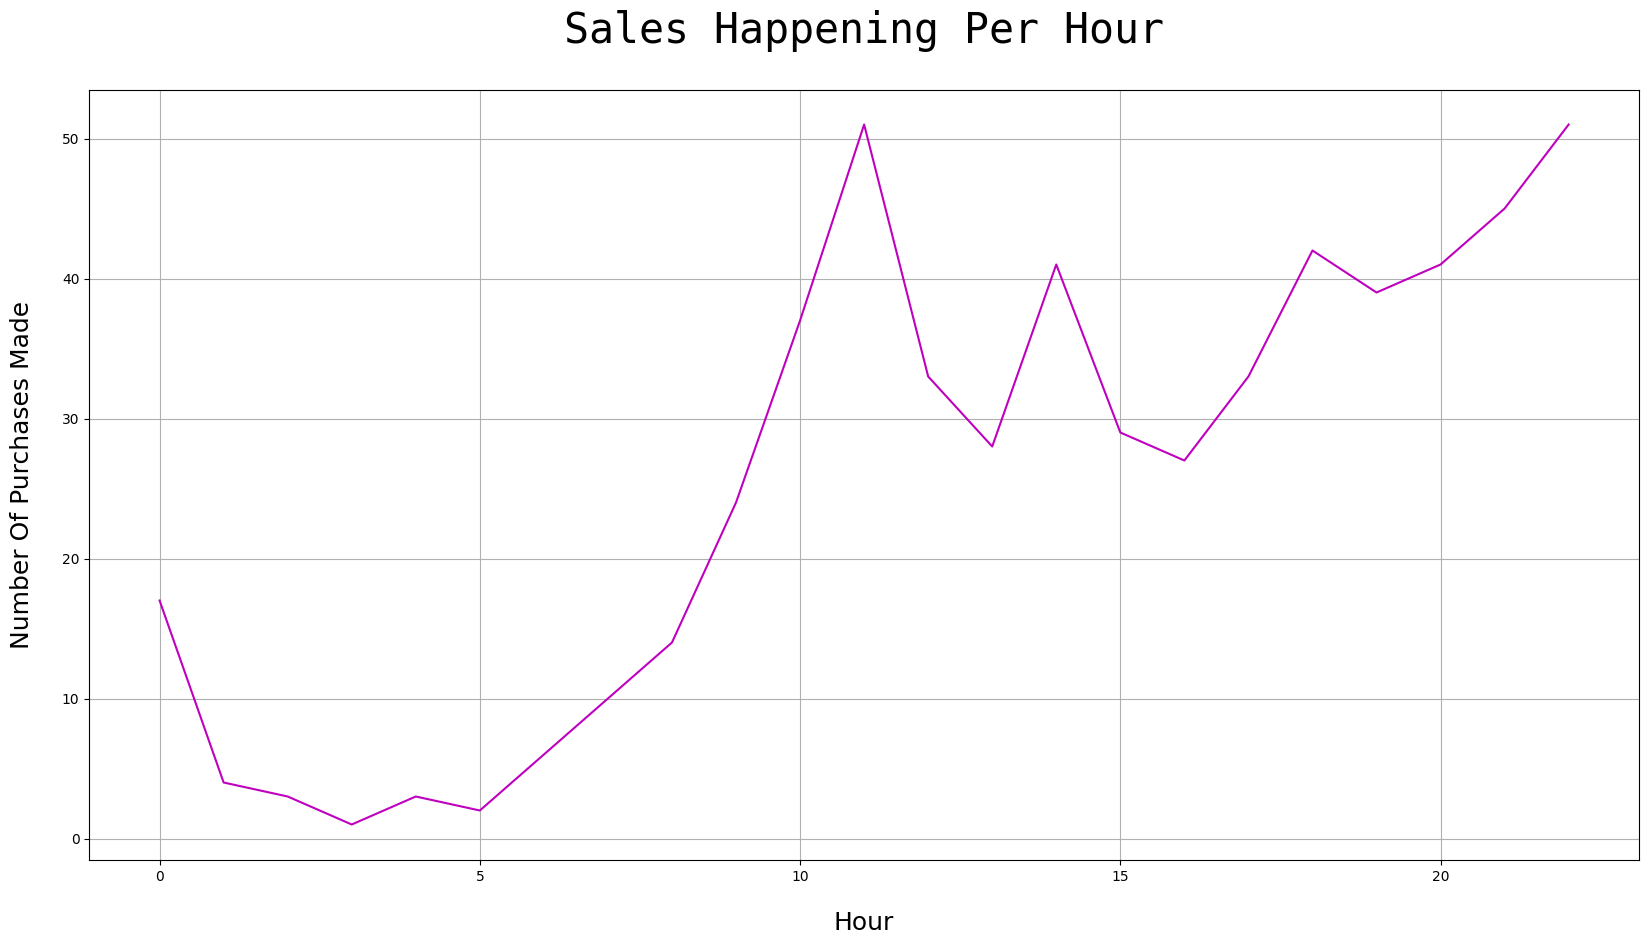

In [123]:
plt.figure(figsize=(20, 10))

plt.title('Sales Happening Per Hour',
		fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1.05)

plt.ylabel("Number Of Purchases Made", fontsize=18, labelpad=20)
plt.xlabel("Hour", fontsize=18, labelpad=20)
plt.plot(hours, order_count, color='m')
plt.grid()
plt.show()

### Analysis Result

In [128]:
print(f"Peak Hour :  {hourly_count_sorted.idxmax()}")
print(f"Lowest Activity Hour : {hourly_count_sorted.idxmin()}")

Peak Hour :  12
Lowest Activity Hour : 3
